R2 score  0.8775705404112865
Accuracy  0.98046875
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       410
           1       0.98      0.92      0.95       102

    accuracy                           0.98       512
   macro avg       0.98      0.96      0.97       512
weighted avg       0.98      0.98      0.98       512

AUC ROC  0.9972740315638451


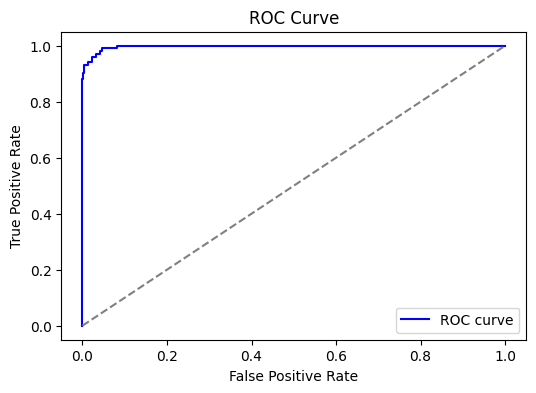

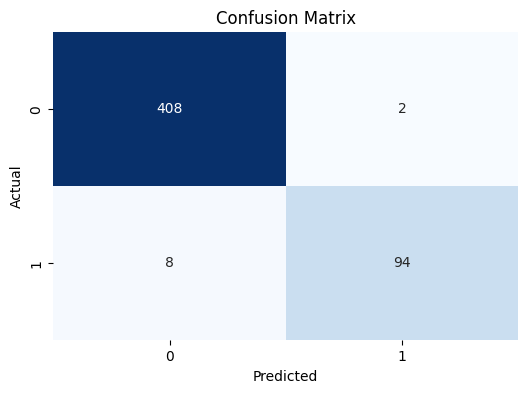

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report





df = pd.read_csv('/content/final_depression_dataset_1.csv')
df.head()
#Drop names beacuse not needed for prediction
df = df.drop(columns=['Name'])

#Missing values
for col in df.columns:
  if df[col].dtype in ['float64', 'int64']:
    #Convert numeric nulls to mean of col
    df[col]=df[col].fillna(df[col].mean())
  else:
    #Convert categorical to most frequent
    df[col] = df[col].fillna(df[col].mode()[0])
#Convert categorical data to numeric
label_enc = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = label_enc.fit_transform(df[col])


#All features for calculation without Depression
X = df.iloc[:, : -1]
#Target values
y = df['Depression']

scaler = StandardScaler()
X = scaler.fit_transform(X)

#Splitting the dataset into training and test
#80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

#Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

#Evaluate
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

#R2 score
r2 = r2_score(y_test, y_pred)
print("R2 score ", r2)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy ", accuracy)

#Classification report
print(classification_report(y_test, y_pred))

#AUC ROC
y_prob = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC ROC ", auc_roc)

#Plot AUC ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label = 'ROC curve'.format(auc_roc))
plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#Plot matrix
plt.figure(figsize=(6,4))
sns.heatmap(cnf_matrix, annot=True, fmt ='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()










